# Jin_Dan_ASSIGNMENT_1

1) Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [4]:
import pandas as pd
import numpy as np

In [5]:
batting = pd.read_csv('batting.csv')

2) Print out the dimensions and info about the dataframe you just created

In [11]:
batting.shape

(102816, 25)

In [12]:
batting.info

<bound method DataFrame.info of          playerID  nameFirst     nameLast  birthYear  yearID  stint teamID  \
0       abercda01      Frank  Abercrombie       1850    1871      1    TRO   
1        addybo01        Bob         Addy       1842    1871      1    RC1   
2       allisar01        Art      Allison       1849    1871      1    CL1   
3       allisdo01       Doug      Allison       1846    1871      1    WS3   
4       ansonca01        Cap        Anson       1852    1871      1    RC1   
5       armstbo01     Robert    Armstrong       1850    1871      1    FW1   
6       barkeal01         Al       Barker       1839    1871      1    RC1   
7       barnero01       Ross       Barnes       1850    1871      1    BS1   
8       barrebi01       Bill      Barrett          0    1871      1    FW1   
9       barrofr01      Frank      Barrows       1844    1871      1    BS1   
10       bassjo01       John         Bass       1848    1871      1    CL1   
11      battijo01        Joe    

3)	How many players have hit 40 or more HRs in one single season? (Number only)

In [13]:
over40 = batting[(batting.HR >= 40)]
over40['playerID'].nunique()


142

4)	How many players have hit more than 600 HRs for their career? (Dataframe)

In [14]:
by_playerID = batting.groupby(['playerID','nameFirst','nameLast'])

In [15]:
m = by_playerID[['HR']].sum()

In [16]:
over600 = m[(m['HR'] > 600)]
over600

,,,HR
playerID,nameFirst,nameLast,
aaronha01,Hank,Aaron,755
bondsba01,Barry,Bonds,762
griffke02,Ken,Griffey,630
mayswi01,Willie,Mays,660
rodrial01,Alex,Rodriguez,696
ruthba01,Babe,Ruth,714
sosasa01,Sammy,Sosa,609
thomeji01,Jim,Thome,612


5)	How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [87]:
bat1=batting.groupby(['playerID','yearID'],as_index=False).agg({'2B':sum,'3B':sum,'H':sum,'HR':sum})

In [89]:
bat1[(bat1['2B']>= 40)&(bat1['3B']>=10)&(bat1['H']>=200)&(bat1['HR']>=30)]['playerID'].nunique()

11

6)	How many players have had 100 or more SBs in a season? (Dataframe)

In [19]:
bat2 = batting.groupby(['yearID','playerID','nameFirst','nameLast']).agg({'SB':'sum'})

In [20]:
bat2[(bat2['SB']>=100)]

SB
yearID playerID  nameFirst nameLast        
1887   brownpe01 Pete      Browning   103.0
       comisch01 Charlie   Comiskey   117.0
       fogarji01 Jim       Fogarty    102.0
       lathaar01 Arlie     Latham     129.0
       nicolhu01 Hugh      Nicol      138.0
       wardjo01  John      Ward       111.0
1888   lathaar01 Arlie     Latham     109.0
       nicolhu01 Hugh      Nicol      103.0
1889   hamilbi01 Billy     Hamilton   111.0
1890   hamilbi01 Billy     Hamilton   102.0
1891   brownto01 Tom       Brown      106.0
       hamilbi01 Billy     Hamilton   111.0
1962   willsma01 Maury     Wills      104.0
1974   brocklo01 Lou       Brock      118.0
1980   henderi01 Rickey    Henderson  100.0
1982   henderi01 Rickey    Henderson  130.0
1983   henderi01 Rickey    Henderson  108.0
1985   colemvi01 Vince     Coleman    110.0
1986   colemvi01 Vince     Coleman    107.0
1987   colemvi01 Vince     Coleman    109.0

7)	How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [21]:
time1960s = batting[(batting['yearID']<= 1969 )&(batting['yearID']>=1960)]

In [22]:
by_playerID_1960s = time1960s.groupby(['playerID','nameFirst','nameLast'])

In [23]:
bp1960s_HR = by_playerID_1960s[['HR']].sum() 

In [24]:
bp1960s_HR[(bp1960s_HR['HR']>200)]

,,,HR
playerID,nameFirst,nameLast,
aaronha01,Hank,Aaron,375
allisbo01,Bob,Allison,225
bankser01,Ernie,Banks,269
cashno01,Norm,Cash,278
cepedor01,Orlando,Cepeda,254
colavro01,Rocky,Colavito,245
howarfr01,Frank,Howard,288
kalinal01,Al,Kaline,210
killeha01,Harmon,Killebrew,393


8)	Who has hit the most HRs in history? (Dataframe)

In [25]:
b = by_playerID.agg({'HR':'sum'})
b[b['HR']==b['HR'].max()]

,,,HR
playerID,nameFirst,nameLast,
bondsba01,Barry,Bonds,762


9)	Who had the most hits in the 1970s? (Dataframe)

In [26]:
time1970s = batting[(batting['yearID']<= 1979 )&(batting['yearID']>=1970)]

In [27]:
by_playerID_1970s = time1970s.groupby(['playerID','nameFirst','nameLast'])

In [28]:
bp1970s_H=by_playerID_1970s.agg({'H':'sum'}) 

In [29]:
bp1970s_H[(bp1970s_H['H'] == bp1970s_H['H'].max())]

,,,H
playerID,nameFirst,nameLast,
rosepe01,Pete,Rose,2045


10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [30]:
u = batting[['playerID','nameFirst','nameLast','yearID','lgID','H','HR','BB','IBB','AB','SF','SH']].dropna()

In [31]:
obp = (u['H']+u['BB']+u['IBB']+u['SH']+ u['SF'])/u['AB']

In [32]:
pa = u['AB']+u['BB']+u['IBB']+u['SH']+u['SF']

In [33]:
u['OBP']= obp

In [34]:
u['PA'] = pa

In [35]:
u[(u['PA']>=500)&(u['yearID']==1977)].sort_values(by ='OBP',ascending=False)[0:5]


,playerID,nameFirst,nameLast,yearID,lgID,H,HR,BB,IBB,AB,SF,SH,OBP,PA
55273,singlke01,Ken,Singleton,1977,AL,176,24,107,13.0,536,6.0,0.0,0.563433,662.0
55280,smithre06,Reggie,Smith,1977,NL,150,32,104,11.0,488,7.0,1.0,0.559426,611.0
55329,tenacge01,Gene,Tenace,1977,NL,102,15,125,10.0,437,4.0,2.0,0.556064,578.0
54820,hargrmi01,Mike,Hargrove,1977,AL,160,18,103,7.0,525,6.0,8.0,0.540952,649.0
54603,carewro01,Rod,Carew,1977,AL,239,14,69,15.0,616,5.0,1.0,0.534091,706.0


11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe

In [36]:
average = u['H']/u['AB']

In [37]:
u['Average'] = average

In [38]:
u[(u['yearID']==2013)&(u['PA']>=300)].sort_values(by='Average',ascending = False)[0:8]

,playerID,nameFirst,nameLast,yearID,lgID,H,HR,BB,IBB,AB,SF,SH,OBP,PA,Average
97188,cabremi01,Miguel,Cabrera,2013,AL,193,44,90,19.0,555,2.0,0.0,0.547748,666.0,0.347748
98062,ramirha01,Hanley,Ramirez,2013,NL,105,20,27,3.0,304,2.0,0.0,0.450658,336.0,0.345395
97300,cuddymi01,Michael,Cuddyer,2013,NL,162,20,46,5.0,489,3.0,0.0,0.441718,543.0,0.331288
97825,mauerjo01,Joe,Mauer,2013,AL,144,11,61,7.0,445,2.0,0.0,0.480899,515.0,0.323596
98293,troutmi01,Mike,Trout,2013,AL,190,27,110,10.0,589,8.0,0.0,0.539898,717.0,0.322581
97651,johnsch05,Chris,Johnson,2013,NL,165,12,29,5.0,514,2.0,0.0,0.391051,550.0,0.321012
97437,freemfr01,Freddie,Freeman,2013,NL,176,23,66,10.0,551,5.0,0.0,0.466425,632.0,0.319419
98043,puigya01,Yasiel,Puig,2013,NL,122,19,36,6.0,382,3.0,0.0,0.437173,427.0,0.319372


12)	Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [39]:
# method 1

In [40]:
p = batting[(batting['yearID']>=1940)&(batting['yearID']<=1949)]

In [41]:
p.groupby('yearID').apply(lambda yearID_df:yearID_df[yearID_df.H==yearID_df.H.max()])[['yearID','playerID','nameFirst','nameLast','H']]


yearID   playerID nameFirst    nameLast    H
yearID                                                    
1940   28773    1940  cramedo01       Doc      Cramer  200
       29010    1940  mccosba01    Barney     McCosky  200
       29084    1940  radclri01       Rip    Radcliff  200
1941   29747    1941  travice01     Cecil      Travis  218
1942   30191    1942  peskyjo01    Johnny       Pesky  205
1943   30709    1943  musiast01      Stan      Musial  220
1944   31389    1944  stirnsn01    Snuffy  Stirnweiss  205
1945   31720    1945  holmeto01     Tommy      Holmes  224
1946   32499    1946  musiast01      Stan      Musial  228
1947   33128    1947  peskyjo01    Johnny       Pesky  207
1948   33671    1948  musiast01      Stan      Musial  230
1949   34242    1949  musiast01      Stan      Musial  207

In [42]:
# method 2 (not good, because because there might be several leaders who had same number of hits in 
# each year. method 2 is better)

In [43]:
p.sort_values(by='H', ascending = False).groupby('yearID',as_index=False).first()[['yearID','playerID','nameFirst','nameLast','H']]

,yearID,playerID,nameFirst,nameLast,H
0,1940,radclri01,Rip,Radcliff,200
1,1941,travice01,Cecil,Travis,218
2,1942,peskyjo01,Johnny,Pesky,205
3,1943,musiast01,Stan,Musial,220
4,1944,stirnsn01,Snuffy,Stirnweiss,205
5,1945,holmeto01,Tommy,Holmes,224
6,1946,musiast01,Stan,Musial,228
7,1947,peskyjo01,Johnny,Pesky,207
8,1948,musiast01,Stan,Musial,230
9,1949,musiast01,Stan,Musial,207


13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number)

In [44]:
q = batting.groupby('yearID').apply(lambda y_df:y_df[y_df.H==y_df.H.max()]) #each year's most hits


In [45]:
s = q.groupby(['playerID','nameFirst','nameLast']).agg({'H':'count'})
s[(s.H==s.H.max())]

,,,H
playerID,nameFirst,nameLast,
cobbty01,Ty,Cobb,7
rosepe01,Pete,Rose,7
suzukic01,Ichiro,Suzuki,7


14) Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [46]:
batting.groupby(['playerID','nameFirst','nameLast']).agg({'G':'sum'}).sort_values(by='G',ascending=False).head()

,,,G
playerID,nameFirst,nameLast,
rosepe01,Pete,Rose,3562
yastrca01,Carl,Yastrzemski,3308
aaronha01,Hank,Aaron,3298
henderi01,Rickey,Henderson,3081
cobbty01,Ty,Cobb,3035


15) How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [47]:
c = batting.groupby('playerID')[['H','HR']].sum()

In [48]:
len(c[(c['H'] > 3000)&(c['HR'] >=500)])

5

16) How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [49]:
batting[(batting['yearID']==1988)][['HR']].sum()

HR    3180
dtype: int64

17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average.


In [50]:
u[(u['nameFirst']=='Wade')&(u['nameLast']=='Boggs')&(u['AB']>=500)][['yearID','playerID','nameFirst','nameLast','Average']].sort_values(by='Average',ascending=False).iloc[0:3]

,yearID,playerID,nameFirst,nameLast,Average
62316,1985,boggswa01,Wade,Boggs,0.367534
65391,1988,boggswa01,Wade,Boggs,0.366438
64335,1987,boggswa01,Wade,Boggs,0.362976


18) Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this

In [51]:
u[(u['yearID']==1995)&(u['PA']>=400)][['playerID','nameFirst','nameLast','OBP','PA']].sort_values(by='OBP',ascending = False).head()

,playerID,nameFirst,nameLast,OBP,PA
73996,thomafr04,Frank,Thomas,0.667343,670.0
73578,martied01,Edgar,Martinez,0.628180,650.0
73611,mcgwima01,Mark,McGwire,0.586751,416.0
73002,bondsba01,Barry,Bonds,0.583004,652.0
73145,davisch01,Chili,Davis,0.577830,534.0


19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader

In [52]:
gy= batting[(batting['yearID']).isin(['1922','1925','1926','1928'])].groupby(['yearID','playerID','nameFirst','nameLast']).agg({'3B':'sum'})
gq=gy.reset_index()
gq.groupby(['yearID']).apply(lambda gp:gp[gp['3B']==gp['3B'].max()])

,,yearID,playerID,nameFirst,nameLast,3B
yearID,,,,,,
1922,88,1922,daubeja01,Jake,Daubert,22
1925,593,1925,cuyleki01,Kiki,Cuyler,26
1926,1487,1926,wanerpa01,Paul,Waner,22
1928,1616,1928,combsea01,Earle,Combs,21


20) How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [53]:
gs=batting.groupby(['playerID','yearID'],as_index = False).agg({'HR':'sum','SB':'sum'})


In [54]:
gs[(gs.HR>=30)&(gs.SB>=30)]['playerID'].nunique()

38

21) Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe)

In [82]:
u1986=u[(u.yearID==1986)]

upa = u1986.groupby(['playerID','nameFirst','nameLast'],as_index = False).agg({'OBP':'max','PA':'sum'})
uo4=upa[(upa.PA>=400)]


In [83]:
uo4[(uo4.OBP==uo4.OBP.max())]

,playerID,nameFirst,nameLast,OBP,PA
78,boggswa01,Wade,Boggs,0.575862,707.0


22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [84]:
u1997=u[(u.yearID==1997)&(u.lgID=='NL')]
upp=u1997.groupby(['playerID','nameFirst','nameLast'],as_index = False).agg({'OBP':'max','PA':'sum'})
up4=upp[(upp.PA>=400)]

In [85]:
up4[up4.OBP==up4.OBP.max()]

,playerID,nameFirst,nameLast,OBP,PA
60,bondsba01,Barry,Bonds,0.637218,716.0


23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [59]:
bl = u[(u.yearID==2012)&(u.PA>=500)].groupby('lgID')

In [60]:
bl.apply(lambda tt:tt[(tt.HR>tt.HR.mean())])

playerID  nameFirst     nameLast  yearID lgID    H  HR   BB  \
lgID                                                                       
AL   95687  beltrad01     Adrian       Beltre    2012   AL  194  36   36   
     95759  butlebi03      Billy       Butler    2012   AL  192  29   54   
     95768  cabremi01     Miguel      Cabrera    2012   AL  205  44   66   
     95777   canoro01   Robinson         Cano    2012   AL  196  33   61   
     95814  cespeyo01     Yoenis     Cespedes    2012   AL  142  23   43   
     95881   cruzne02     Nelson         Cruz    2012   AL  152  24   48   
     95894  davisch02      Chris        Davis    2012   AL  139  33   37   
     95952   dunnad01       Adam         Dunn    2012   AL  110  41  105   
     95969  encared01      Edwin  Encarnacion    2012   AL  152  42   84   
     95993  fieldpr01     Prince      Fielder    2012   AL  182  30   85   
     96081  grandcu01     Curtis   Granderson    2012   AL  138  43   75   
     96114  hamiljo03       Josh     Hamilton    2012   AL  160  43   60   
     96125  hardyjj01      J. J.        Hardy    2012   AL  158  22   38   
     96248  jonesad01       Adam        Jones    2012   AL  186  32   34   
     96282  konerpa01       Paul      Konerko    2012   AL  159  26   56   
     96469  moralke01    Kendrys      Morales    2012   AL  132  22   31   
     96485  moustmi01       Mike    Moustakas    2012   AL  136  20   39   
     96611  pierzaj01      A. J.   Pierzynski    2012   AL  133  27   28   
     96628  pujolal01     Albert       Pujols    2012   AL  173  30   52   
     96659  rasmuco01      Colby       Rasmus    2012   AL  126  23   47   
     96663  reddijo01       Josh      Reddick    2012   AL  148  32   55   
     96671  reynoma01       Mark     Reynolds    2012   AL  101  23   73   
     96677   riosal01       Alex         Rios    2012   AL  184  25   26   
     96717   rossco01       Cody         Ross    2012   AL  127  22   42   
     96779  seageky01       Kyle       Seager    2012   AL  154  20   46   
     96846  swishni01       Nick      Swisher    2012   AL  146  24   77   
     96857  teixema01       Mark     Teixeira    2012   AL  113  24   54   
     96889  troutmi01       Mike        Trout    2012   AL  182  30   67   
     96890  trumbma01       Mark       Trumbo    2012   AL  146  32   36   
     96897  uptonbj01     Melvin        Upton    2012   AL  141  28   45   
...               ...        ...          ...     ...  ...  ...  ..  ...   
     96971  willijo03       Josh   Willingham    2012   AL  135  35   76   
     97002  zobribe01        Ben      Zobrist    2012   AL  151  20   97   
NL   95619  alvarpe01      Pedro      Alvarez    2012   NL  128  30   57   
     95688  beltrca01     Carlos      Beltran    2012   NL  147  32   65   
     95728  braunry02       Ryan        Braun    2012   NL  191  41   63   
     95741  bruceja01        Jay        Bruce    2012   NL  141  34   62   
     95871  craigal01      Allen        Craig    2012   NL  144  22   37   
     95895  davisik02        Ike        Davis    2012   NL  118  32   61   
     95918  desmoia01        Ian      Desmond    2012   NL  150  25   30   
     96021  freemfr01    Freddie      Freeman    2012   NL  140  23   64   
     96070  gonzaca01     Carlos     Gonzalez    2012   NL  157  22   56   
     96127  harpebr03      Bryce       Harper    2012   NL  144  22   56   
     96133   hartco01      Corey         Hart    2012   NL  152  30   44   
     96138  headlch01      Chase      Headley    2012   NL  173  31   86   
     96165  heywaja01      Jason      Heyward    2012   NL  158  27   58   
     96167   hillaa01      Aaron         Hill    2012   NL  184  26   52   
     96180  hollima01       Matt     Holliday    2012   NL  177  27   75   
     96251  jonesga02    Garrett        Jones    2012   NL  130  27   33   
     96291  kubelja01      Jason        Kubel    2012   NL  128  30   57   
     96301  larocad01       Adam      LaRoche    2012   NL  1

24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [61]:
batting['Age']=batting['yearID']-batting['birthYear']

In [79]:
gyp = batting.groupby(['yearID','Age','playerID','nameFirst','nameLast'],as_index=False).agg({'HR':'sum'})

gyp[gyp.HR>=50].sort_values(by='Age').head(1)

,yearID,Age,playerID,nameFirst,nameLast,HR
82314,2007,23,fieldpr01,Prince,Fielder,50


25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [69]:
qq=batting.groupby(['playerID','nameFirst','nameLast']).agg({'HR':'sum','Age':'mean'})

In [72]:
qq[(qq['HR']>=300)].sort_values(by='Age').head(5)

,,,HR,Age
playerID,nameFirst,nameLast,,
cabremi01,Miguel,Cabrera,446,26.5
fieldpr01,Prince,Fielder,319,26.5
santoro01,Ron,Santo,342,27.0
jonesan01,Andruw,Jones,434,27.0
luzingr01,Greg,Luzinski,307,27.0


26)Graph total HRs per season using bar graph

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[Text(0,0.5,'Total HRs'),
 Text(0.5,0,'Seasons'),
 Text(0.5,1,'Total HRs per season')]

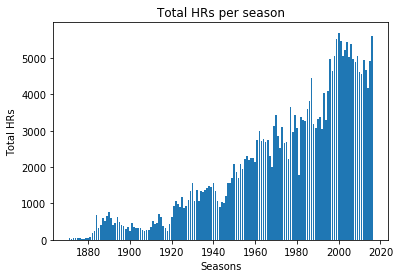

In [94]:
by = batting.groupby('yearID',as_index=False).agg({'HR':sum})
plt.bar(by['yearID'], by['HR'])
plt.axes().set(xlabel='Seasons', ylabel='Total HRs', title='Total HRs per season')

In [ ]:
27)Using a line graph please graph the average HRs per AB (think about this) per season

C:\anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[Text(0,0.5,'HRs per AB'),
 Text(0.5,0,'Season'),
 Text(0.5,1,'the Average HRs per AB per season')]

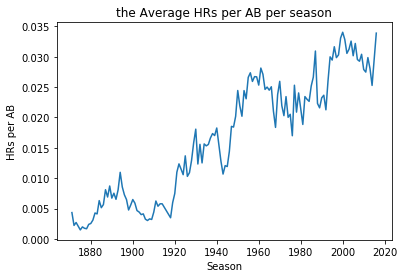

In [96]:
byq= batting.groupby(['yearID'],as_index=False).agg({'HR':sum,'AB':sum})
byq['HRs per AB'] = byq['HR']/byq['AB']
plt.plot(byq['yearID'].values,byq['HRs per AB'].values)
plt.axes().set(xlabel='Season',ylabel='HRs per AB',title='the Average HRs per AB per season')

Github Link: https://github.com/danjin1986/6340HW1